In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers,optimizers
from keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle              # For saving models to disk and loading saved models
import os
import zipfile
import PIL
import PIL.Image
import pathlib
import cv2 as cv

C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Initializing the random number generator
import random
random.seed(0)

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# memory footprint support libraries / code
#!ln -sf /opt/bin/nvidia-smi /usr/bin/nvdia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu=GPUs[0]

In [6]:
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM free: " + humanize.naturalsize(psutil.virtual_memory().available),
          " | Proc size " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree,gpu.memoryUsed,gpu.memoryUtil*100,gpu.memoryTotal))
printm()

Gen RAM free: 1.7 GB  | Proc size 349.3 MB
GPU RAM Free: 3962MB | Used: 134MB | Util   3% | Total 4096MB


In [42]:
path = 'C:/Users/uprak/capstone'
os.chdir(path)


In [43]:
ls

 Volume in drive C is Windows
 Volume Serial Number is D87D-3DAA

 Directory of C:\Users\uprak\capstone

12-12-2021  09:12    <DIR>          .
12-12-2021  09:12    <DIR>          ..
07-12-2021  17:05    <DIR>          .ipynb_checkpoints
07-12-2021  15:56    <DIR>          Annotations
12-12-2021  09:12         4,263,595 capstone_cv2.ipynb
09-12-2021  19:30    <DIR>          Car Images
07-12-2021  15:13             5,454 Car names and make.csv
07-12-2021  16:01         1,666,501 test.csv
07-12-2021  22:35         6,514,171 test1.csv
07-12-2021  16:01         1,696,197 train.csv
07-12-2021  22:17         7,129,237 train1.csv
               6 File(s)     21,275,155 bytes
               5 Dir(s)  98,481,082,368 bytes free


In [44]:
path1 = os.getcwd()
path1

'C:\\Users\\uprak\\capstone'

In [45]:
car_img_path = os.path.join(path1,'Car Images')
car_ann_path = os.path.join(path1,'Annotations')

In [46]:
ds_car_name = pd.read_csv("Car names and make.csv",names=['Car Name'])
ds_car_name

Car Name
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [47]:
count = 0
car_dict = {}
for car_name in ds_car_name['Car Name'].values:
    car_dict[count+1] = car_name
    count=count+1
car_dict


{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [48]:
train_img_dir = os.path.join(car_img_path,'Train Images')
test_img_dir =  os.path.join(car_img_path,'Test Images')

In [49]:
ds_train_ann = pd.read_csv(os.path.join(car_ann_path,'Train Annotations.csv'),names=['Image_Name','Start_x','Start_y','End_x','End_y','Image_class'])
ds_test_ann = pd.read_csv(os.path.join(car_ann_path,'Test Annotation.csv'),names=['Image_Name','Start_x','Start_y','End_x','End_y','Image_class'])

In [50]:
ds_train_ann.drop([ds_train_ann.index[0]],inplace=True)
ds_test_ann.drop([ds_test_ann.index[0]],inplace=True)

In [51]:
ds_train_ann.reset_index(inplace=True,drop=True)
ds_test_ann.reset_index(inplace=True,drop=True)
ds_train_ann.head(5)

Image_Name Start_x  Start_y   End_x   End_y Image_class
0  00001.jpg      39    116.0   569.0   375.0          14
1  00002.jpg      36    116.0   868.0   587.0           3
2  00003.jpg      85    109.0   601.0   381.0          91
3  00004.jpg     621    393.0  1484.0  1096.0         134
4  00005.jpg      14     36.0   133.0    99.0         106

<AxesSubplot:xlabel='Image_class', ylabel='Count'>

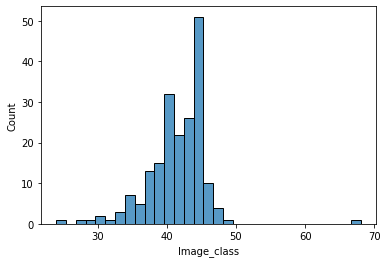

In [52]:
sns.histplot(ds_train_ann['Image_class'].value_counts())

<AxesSubplot:xlabel='Image_class', ylabel='Count'>

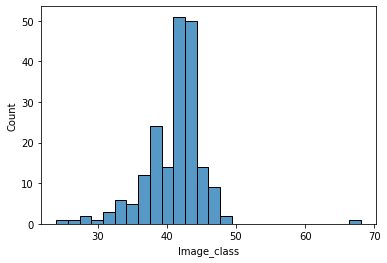

In [53]:
sns.histplot(ds_test_ann['Image_class'].value_counts())

In [54]:
def load_images_from_folder(folder):
    #file_name = []
    file_path = {}
    count = 0
    for folders in os.listdir(folder):
        #print(folders)
        if folders == '.DS_Store':
            pass
        else:
            foldername = os.path.join(folder,folders)
            #print(foldername)
            for filename in os.listdir(foldername):
                count = count+1
                filepath = os.path.join(foldername,filename)
                #file_name.append(filename)
                file_path[filename]=filepath
                #print(filename)
    return file_path

In [55]:
train_images_path = load_images_from_folder(train_img_dir)
test_images_path = load_images_from_folder(test_img_dir)
ds_train_ann['Image_Path'] = ds_train_ann['Image_Name'].apply(lambda x:train_images_path[x])
ds_train_ann['Car_Name'] = ds_train_ann['Image_class'].apply(lambda x:car_dict[int(x)])
ds_train_ann['Start_x'] = ds_train_ann.Start_x.astype(float)
ds_train_ann['Image_class'] = ds_train_ann.Image_class.astype(int)
ds_train_ann['Bbox'] = ds_train_ann.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
ds_test_ann['Image_Path'] = ds_test_ann['Image_Name'].apply(lambda x:test_images_path[x])
ds_test_ann['Start_x'] = ds_test_ann.Start_x.astype(float)
ds_test_ann['Image_class'] = ds_test_ann.Image_class.astype(int)
ds_test_ann['Car_Name'] = ds_test_ann['Image_class'].apply(lambda x:car_dict[int(x)])
ds_test_ann['Bbox'] = ds_test_ann.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)

In [56]:
ds_train_ann


Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0     00001.jpg     39.0    116.0   569.0   375.0           14   
1     00002.jpg     36.0    116.0   868.0   587.0            3   
2     00003.jpg     85.0    109.0   601.0   381.0           91   
3     00004.jpg    621.0    393.0  1484.0  1096.0          134   
4     00005.jpg     14.0     36.0   133.0    99.0          106   
...         ...      ...      ...     ...     ...          ...   
8139  08140.jpg      3.0     44.0   423.0   336.0           78   
8140  08141.jpg    138.0    150.0   706.0   523.0          196   
8141  08142.jpg     26.0    246.0   660.0   449.0          163   
8142  08143.jpg     78.0    526.0  1489.0   908.0          112   
8143  08144.jpg     20.0    240.0   862.0   677.0           17   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Train Image...   
1     C:\Users\uprak\capstone\Car Images\Train Image...   
2     C:\Users\uprak\capstone\Car Images\Train Image...   
3     C:\Users\uprak\capstone\Car Images\Train Image...   
4     C:\Users\uprak\capstone\Car Images\Train Image...   
...                                                 ...   
8139  C:\Users\uprak\capstone\Car Images\Train Image...   
8140  C:\Users\uprak\capstone\Car Images\Train Image...   
8141  C:\Users\uprak\capstone\Car Images\Train Image...   
8142  C:\Users\uprak\capstone\Car Images\Train Image...   
8143  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                            Bbox  
0                        Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]  
1                        Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]  
2                 Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]  
3           Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]  
4        Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]  
...                                      ...                             ...  
8139  Chrysler Town and Country Minivan 2012       [3.0, 44.0, 423.0, 336.0]  
8140           smart fortwo Convertible 2012    [138.0, 150.0, 706.0, 523.0]  
8141       Mercedes-Benz SL-Class Coupe 2009     [26.0, 246.0, 660.0, 449.0]  
8142                      Ford GT Coupe 2006    [78.0, 526.0, 1489.0, 908.0]  
8143                     Audi 100 Sedan 1994     [20.0, 240.0, 862.0, 677.0]  

[8144 rows x 9 columns]

In [128]:
df_bb = ds_train_ann[['Image_Name','Start_x','Start_y','End_x','End_y','Car_Name','Image_class','Image_Path']]

array([[<AxesSubplot:xlabel='Start_x', ylabel='Start_x'>,
        <AxesSubplot:xlabel='Start_y', ylabel='Start_x'>,
        <AxesSubplot:xlabel='End_x', ylabel='Start_x'>,
        <AxesSubplot:xlabel='End_y', ylabel='Start_x'>,
        <AxesSubplot:xlabel='Image_class', ylabel='Start_x'>],
       [<AxesSubplot:xlabel='Start_x', ylabel='Start_y'>,
        <AxesSubplot:xlabel='Start_y', ylabel='Start_y'>,
        <AxesSubplot:xlabel='End_x', ylabel='Start_y'>,
        <AxesSubplot:xlabel='End_y', ylabel='Start_y'>,
        <AxesSubplot:xlabel='Image_class', ylabel='Start_y'>],
       [<AxesSubplot:xlabel='Start_x', ylabel='End_x'>,
        <AxesSubplot:xlabel='Start_y', ylabel='End_x'>,
        <AxesSubplot:xlabel='End_x', ylabel='End_x'>,
        <AxesSubplot:xlabel='End_y', ylabel='End_x'>,
        <AxesSubplot:xlabel='Image_class', ylabel='End_x'>],
       [<AxesSubplot:xlabel='Start_x', ylabel='End_y'>,
        <AxesSubplot:xlabel='Start_y', ylabel='End_y'>,
        <AxesSubplot:xlab

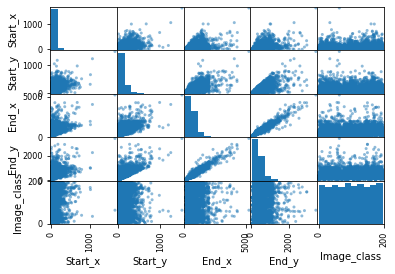

In [129]:
pd.plotting.scatter_matrix(df_bb, alpha=0.5)

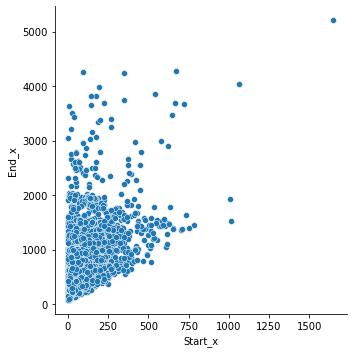

In [130]:
sns.relplot(x='Start_x',y='End_x',data=df_bb)

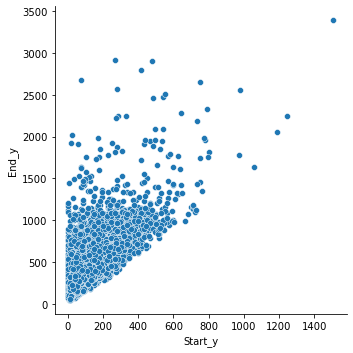

In [131]:
sns.relplot(x='Start_y',y='End_y',data=df_bb)

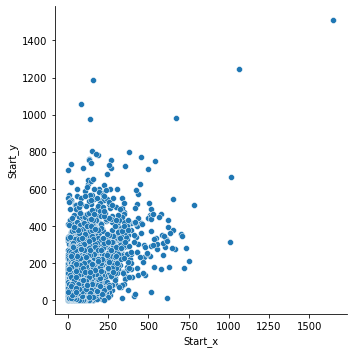

In [132]:
sns.relplot(x='Start_x',y='Start_y',data=df_bb)

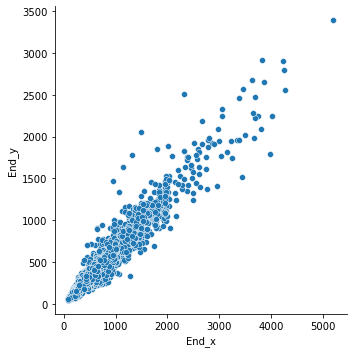

In [133]:
sns.relplot(x='End_x',y='End_y',data=df_bb)

In [173]:
df_bb['width'] = (df_bb['End_x'] - df_bb['Start_x'])
df_bb['height'] = (df_bb['End_y'] - df_bb['Start_y'])
df_bb['area'] = df_bb['height'] * df_bb['width']

In [174]:
df_bb.head(5)

Image_Name  Start_x  Start_y   End_x   End_y  \
0  00001.jpg     39.0    116.0   569.0   375.0   
1  00002.jpg     36.0    116.0   868.0   587.0   
2  00003.jpg     85.0    109.0   601.0   381.0   
3  00004.jpg    621.0    393.0  1484.0  1096.0   
4  00005.jpg     14.0     36.0   133.0    99.0   

                              Car_Name  Image_class  \
0                  Audi TTS Coupe 2012           14   
1                  Acura TL Sedan 2012            3   
2           Dodge Dakota Club Cab 2007           91   
3     Hyundai Sonata Hybrid Sedan 2012          134   
4  Ford F-450 Super Duty Crew Cab 2012          106   

                                          Image_Path  width  height      area  
0  C:\Users\uprak\capstone\Car Images\Train Image...  530.0   259.0  137270.0  
1  C:\Users\uprak\capstone\Car Images\Train Image...  832.0   471.0  391872.0  
2  C:\Users\uprak\capstone\Car Images\Train Image...  516.0   272.0  140352.0  
3  C:\Users\uprak\capstone\Car Images\Train Image...  863.0   703.0  606689.0  
4  C:\Users\uprak\capstone\Car Images\Train Image...  119.0    63.0    7497.0

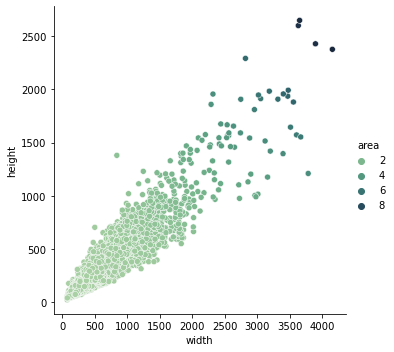

In [175]:
sns.relplot(x='width',y='height',hue='area',palette="ch:r=-.5,l=.75",data=df_bb)

In [191]:
df_bb[df_bb['area']<=5000.0]


Image_Name  Start_x  Start_y  End_x  End_y  \
96    00097.jpg      3.0      7.0   76.0   50.0   
215   00216.jpg     21.0     45.0  133.0   88.0   
461   00462.jpg      5.0      8.0   83.0   58.0   
1039  01040.jpg     28.0     21.0  105.0   79.0   
1786  01787.jpg     11.0     26.0   98.0   68.0   
2046  02047.jpg     43.0     50.0  136.0   90.0   
2291  02292.jpg      2.0     15.0   83.0   61.0   
2427  02428.jpg      5.0      5.0   92.0   62.0   
3434  03435.jpg      4.0     15.0   87.0   54.0   
4046  04047.jpg     12.0     19.0  100.0   54.0   
4589  04590.jpg     83.0     67.0  181.0  114.0   
4666  04667.jpg      3.0      9.0   91.0   59.0   
5223  05224.jpg      5.0     14.0   93.0   58.0   
5656  05657.jpg      5.0      8.0   91.0   59.0   
5803  05804.jpg      4.0     15.0   94.0   63.0   
6283  06284.jpg      7.0     41.0   83.0   64.0   
6361  06362.jpg      2.0     19.0  104.0   60.0   
6483  06484.jpg      1.0     11.0   92.0   47.0   
7346  07347.jpg      6.0     12.0   86.0   49.0   
7468  07469.jpg      3.0     13.0   76.0   52.0   
8086  08087.jpg      5.0     14.0   84.0   55.0   

                                             Car_Name  Image_class  \
96    Chevrolet Corvette Ron Fellows Edition Z06 2007           57   
215                               GMC Savana Van 2012          119   
461                        AM General Hummer SUV 2000            1   
1039                    Dodge Sprinter Cargo Van 2009           88   
1786                       Geo Metro Convertible 1993          123   
2046  Chevrolet Corvette Ron Fellows Edition Z06 2007           57   
2291                              Audi 100 Wagon 1994           18   
2427                       Geo Metro Convertible 1993          123   
3434                              Audi 100 Wagon 1994           18   
4046                       Geo Metro Convertible 1993          123   
4589                  Chevrolet Tahoe Hybrid SUV 2012           62   
4666                       Geo Metro Convertible 1993          123   
5223                       AM General Hummer SUV 2000            1   
5656                       AM General Hummer SUV 2000            1   
5803                       AM General Hummer SUV 2000            1   
6283  Chevrolet Corvette Ron Fellows Edition Z06 2007           57   
6361                              Audi 100 Wagon 1994           18   
6483                       Geo Metro Convertible 1993          123   
7346                       Geo Metro Convertible 1993          123   
7468  Chevrolet Corvette Ron Fellows Edition Z06 2007           57   
8086                       Geo Metro Convertible 1993          123   

                                             Image_Path  width  height    area  
96    C:\Users\uprak\capstone\Car Images\Train Image...   73.0    43.0  3139.0  
215   C:\Users\uprak\capstone\Car Images\Train Image...  112.0    43.0  4816.0  
461   C:\Users\uprak\capstone\Car Images\Train Image...   78.0    50.0  3900.0  
1039  C:\Users\uprak\capstone\Car Images\Train Image...   77.0    58.0  4466.0  
1786  C:\Users\uprak\capstone\Car Images\Train Image...   87.0    42.0  3654.0  
2046  C:\Users\uprak\capstone\Car Images\Train Image...   93.0    40.0  3720.0  
2291  C:\Users\uprak\capstone\Car Images\Train Image...   81.0    46.0  3726.0  
2427  C:\Users\uprak\capstone\Car Images\Train Image...   87.0    57.0  4959.0  
3434  C:\Users\uprak\capstone\Car Images\Train Image...   83.0    39.0  3237.0  
4046  C:\Users\uprak\capstone\Car Images\Train Image...   88.0    35.0  3080.0  
4589  C:\Users\uprak\capstone\Car Images\Train Image...   98.0    47.0  4606.0  
4666  C:\Users\uprak\capstone\Car Images\Train Image...   88.0    50.0  4400.0  
5223  C:\Users\uprak\capstone\Car Images\Train Image...   88.0    44.0  3872.0  
5656  C:\Users\uprak\capstone\Car Images\Train Image...   86.0    51.0  4386.0  
5803  C:\Users\uprak\capstone\Car Images\Train Image...   90.0    48.0  4320.0  
6283  C:\Users\uprak\capstone\Car Images\Trai

<AxesSubplot:xlabel='area', ylabel='Density'>

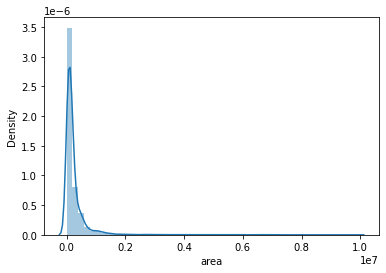

In [179]:
sns.distplot(df_bb['area'])

In [181]:
df_bb[df_bb['area']>=4000000]

Image_Name  Start_x  Start_y   End_x   End_y  \
76    00077.jpg     25.0     25.0  3502.0  2017.0   
229   00230.jpg    223.0    542.0  3692.0  2478.0   
258   00259.jpg     75.0    254.0  2514.0  1929.0   
345   00346.jpg    112.0     21.0  2859.0  1928.0   
1032  01033.jpg     49.0    279.0  2791.0  1870.0   
1062  01063.jpg    351.0    286.0  3753.0  2243.0   
1426  01427.jpg    347.0    476.0  4243.0  2904.0   
2068  02069.jpg      1.0    550.0  2320.0  2506.0   
2078  02079.jpg     45.0    181.0  2582.0  1848.0   
2086  02087.jpg     19.0    533.0  3220.0  1953.0   
2142  02143.jpg      8.0     76.0  3640.0  2675.0   
2363  02364.jpg    373.0     56.0  2663.0  1915.0   
2995  02996.jpg    174.0    271.0  3826.0  2919.0   
3184  03185.jpg    673.0    981.0  4278.0  2553.0   
3229  03230.jpg     36.0    122.0  3433.0  1518.0   
3488  03489.jpg      1.0    329.0  3054.0  2242.0   
4103  04104.jpg     48.0     74.0  2608.0  1640.0   
4136  04137.jpg    199.0    482.0  3385.0  2465.0   
4302  04303.jpg    192.0    581.0  3976.0  1791.0   
4397  04398.jpg    721.0    172.0  3678.0  1982.0   
5224  05225.jpg    108.0    103.0  2743.0  1758.0   
5436  05437.jpg     96.0    416.0  4252.0  2792.0   
5536  05537.jpg    667.0    274.0  3686.0  2221.0   
5554  05555.jpg    144.0    643.0  3656.0  2288.0   
5944  05945.jpg   1648.0   1508.0  5205.0  3389.0   
6130  06131.jpg    271.0    440.0  3392.0  1955.0   
6451  06452.jpg    645.0    281.0  3464.0  2572.0   
7192  07193.jpg    542.0    749.0  3860.0  2657.0   
7329  07330.jpg    143.0    541.0  3812.0  2094.0   
7385  07386.jpg    178.0    790.0  3061.0  2333.0   
7539  07540.jpg    417.0    497.0  2981.0  2088.0   

                                               Car_Name  Image_class  \
76                                   Ford Edge SUV 2012          110   
229                           Suzuki SX4 Hatchback 2012          183   
258                             Toyota Camry Sedan 2012          187   
345                          Chevrolet Sonic Sedan 2012           63   
1032                        Chevrolet Impala Sedan 2007           61   
1062             Chrysler Town and Country Minivan 2012           78   
1426                              Jeep Compass SUV 2012          149   
2068                         Nissan Leaf Hatchback 2012          168   
2078          Chevrolet Silverado 1500 Regular Cab 2012           75   
2086                            BMW 3 Series Wagon 2012           30   
2142                           Plymouth Neon Coupe 1999          172   
2363                                Acura TL Sedan 2012            3   
2995                              Jeep Compass SUV 2012          149   
3184                        Chevrolet Corvette ZR1 2012           56   
3229                       Mitsubishi Lancer Sedan 2012          167   
3488                              Jeep Compass SUV 2012          149   
4103  Chevrolet Silverado 1500 Classic Extended Cab ...           70   
4136                        Chevrolet Traverse SUV 2012           58   
4302                   Mercedes-Benz E-Class Sedan 2012          164   
4397                       Rolls-Royce Ghost Sedan 2012          176   
5224                            Scion xD Hatchback 2012          178   
5436                        Chevrolet Impala Sedan 2007           61   
5536                       Rolls-Royce Ghost Sedan 2012          176   
5554    Chevrolet Corvette Ron Fellows Edition Z06 2007           57   
5944                         Chevrolet Sonic Sedan 2012           63   
6130                                 Ford Edge SUV 2012          110   
6451                              Jeep Patriot SUV 2012          145   
7192                            BMW M6 Convertible 2010           36   
7329                           Hyundai Azera Sedan 2012          140   
7385               Aston Martin Virage Convertible 2012           10   
7539                     Volkswagen Golf Hatchback 1991          191   

   

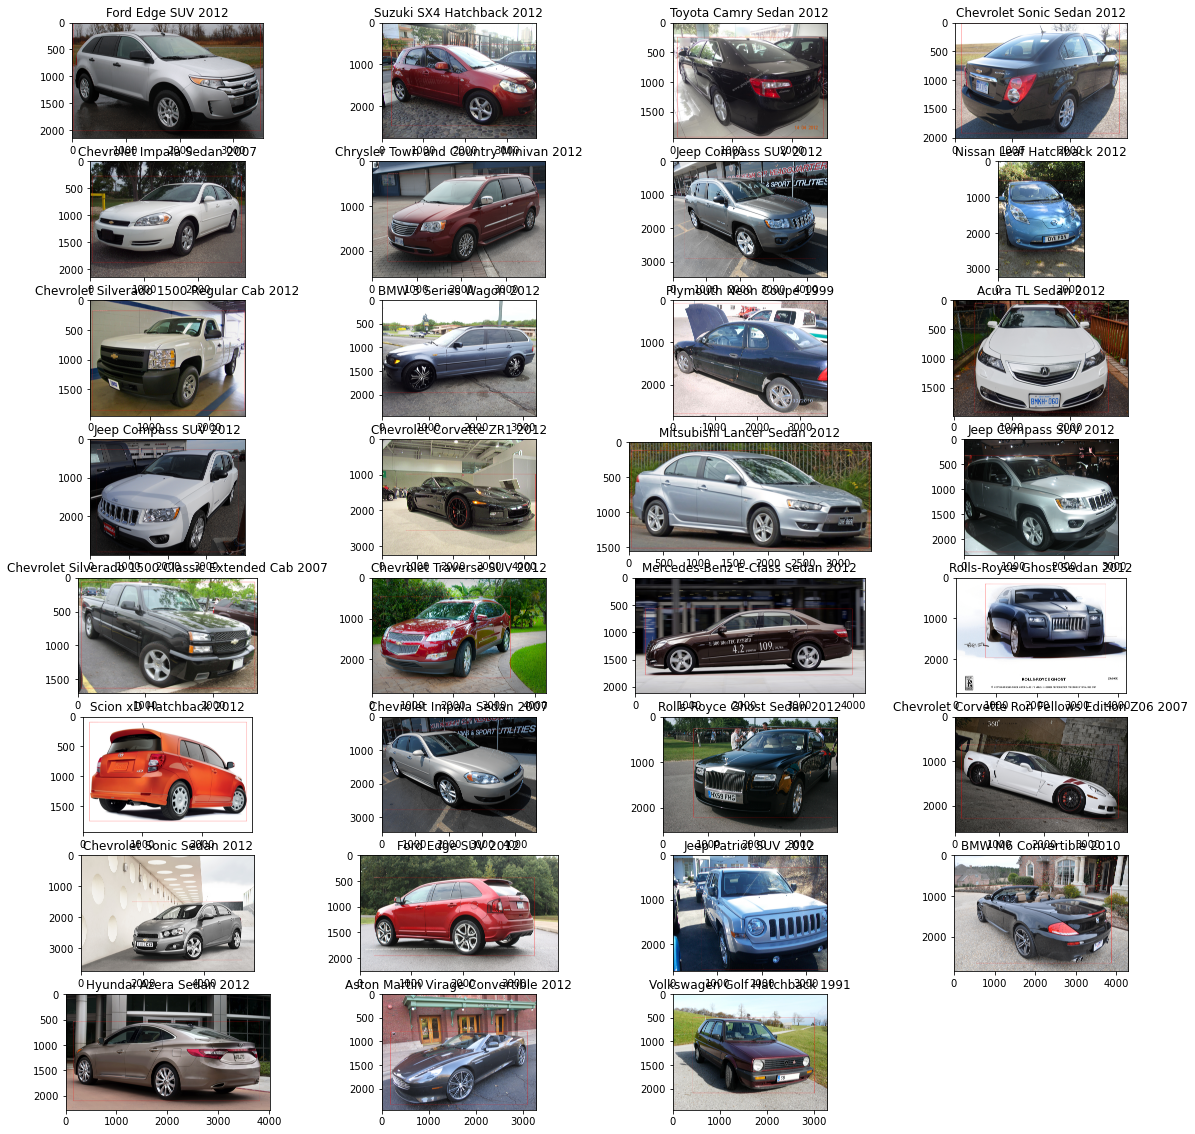

In [183]:
df_visualize = df_bb[df_bb['area']>=4000000]
df_visualize['Bbox'] = df_visualize.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
image_paths = list(df_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_visualize['Car_Name'])
bbox_list = list(df_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 4
rows = 8

pics = []
for i in range(columns*rows-1):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

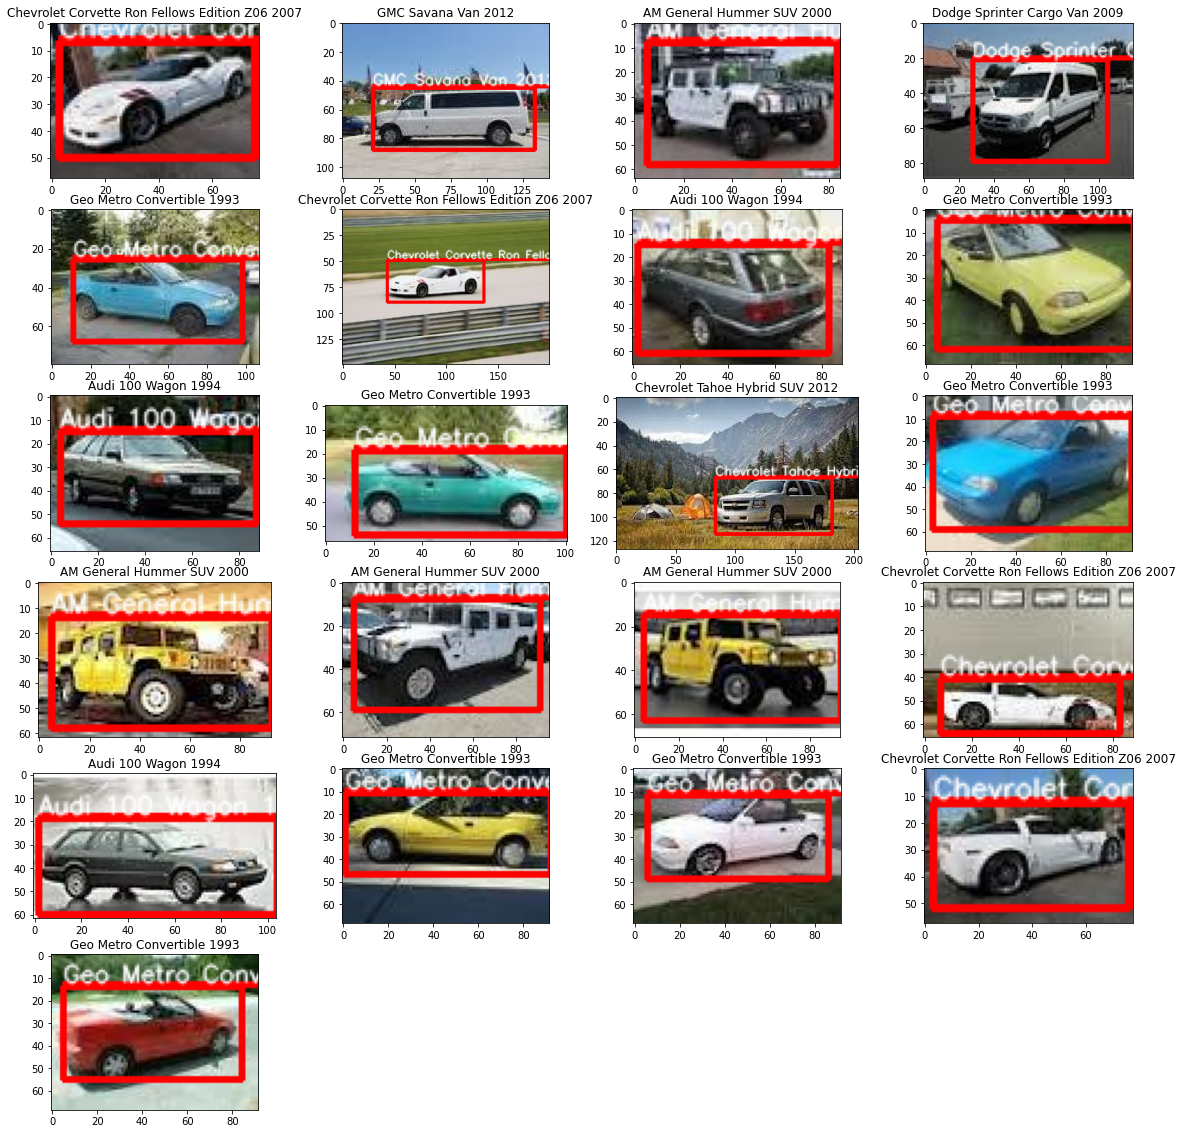

In [192]:
df_visualize = df_bb[df_bb['area']<=5000.0]
df_visualize['Bbox'] = df_visualize.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
image_paths = list(df_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_visualize['Car_Name'])
bbox_list = list(df_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 4
rows = 6

pics = []
for i in range(columns*rows-3):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

In [19]:
def get_image_dims(df,col):
    height = []
    width = []
    for img_path in df[col].values:
        img = cv.imread(img_path)
        height.append(int(img.shape[0]))
        width.append(int(img.shape[1]))
    return height,width

#ds_train_ann['Orig_img_height'],ds_train_ann['Orig_img_width'] =  get_image_dims(ds_train_ann,'Image_Path')
#ds_test_ann['Orig_img_height'],ds_test_ann['Orig_img_width'] =  get_image_dims(ds_test_ann,'Image_Path')

In [20]:
ds_train_ann

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0     00001.jpg     39.0    116.0   569.0   375.0           14   
1     00002.jpg     36.0    116.0   868.0   587.0            3   
2     00003.jpg     85.0    109.0   601.0   381.0           91   
3     00004.jpg    621.0    393.0  1484.0  1096.0          134   
4     00005.jpg     14.0     36.0   133.0    99.0          106   
...         ...      ...      ...     ...     ...          ...   
8139  08140.jpg      3.0     44.0   423.0   336.0           78   
8140  08141.jpg    138.0    150.0   706.0   523.0          196   
8141  08142.jpg     26.0    246.0   660.0   449.0          163   
8142  08143.jpg     78.0    526.0  1489.0   908.0          112   
8143  08144.jpg     20.0    240.0   862.0   677.0           17   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Train Image...   
1     C:\Users\uprak\capstone\Car Images\Train Image...   
2     C:\Users\uprak\capstone\Car Images\Train Image...   
3     C:\Users\uprak\capstone\Car Images\Train Image...   
4     C:\Users\uprak\capstone\Car Images\Train Image...   
...                                                 ...   
8139  C:\Users\uprak\capstone\Car Images\Train Image...   
8140  C:\Users\uprak\capstone\Car Images\Train Image...   
8141  C:\Users\uprak\capstone\Car Images\Train Image...   
8142  C:\Users\uprak\capstone\Car Images\Train Image...   
8143  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                            Bbox  
0                        Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]  
1                        Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]  
2                 Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]  
3           Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]  
4        Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]  
...                                      ...                             ...  
8139  Chrysler Town and Country Minivan 2012       [3.0, 44.0, 423.0, 336.0]  
8140           smart fortwo Convertible 2012    [138.0, 150.0, 706.0, 523.0]  
8141       Mercedes-Benz SL-Class Coupe 2009     [26.0, 246.0, 660.0, 449.0]  
8142                      Ford GT Coupe 2006    [78.0, 526.0, 1489.0, 908.0]  
8143                     Audi 100 Sedan 1994     [20.0, 240.0, 862.0, 677.0]  

[8144 rows x 9 columns]

In [21]:
#ds_train_ann.to_csv("train1.csv", index=False)

In [22]:
#ds_test_ann.to_csv("test1.csv",index=False)

In [23]:
df_train = pd.read_csv("train1.csv")
df_test = pd.read_csv("test1.csv")

In [24]:
df_train.sample(10)

Image_Name  Start_x  Start_y  End_x  End_y  Image_class  \
4815  04816.jpg     79.0     84.0  528.0  327.0            3   
3264  03265.jpg     33.0    150.0  619.0  409.0            6   
4342  04343.jpg    143.0    310.0  915.0  656.0          112   
6332  06333.jpg     80.0     81.0  575.0  393.0           85   
3320  03321.jpg      8.0     59.0  498.0  266.0           16   
6880  06881.jpg     28.0     75.0  618.0  290.0           84   
1824  01825.jpg     79.0     49.0  555.0  421.0           35   
7349  07350.jpg     24.0     48.0  646.0  337.0          128   
2237  02238.jpg     68.0    135.0  389.0  282.0          138   
4571  04572.jpg      3.0    122.0  550.0  333.0           82   

                                             Image_Path  \
4815  C:\Users\uprak\capstone\Car Images\Train Image...   
3264  C:\Users\uprak\capstone\Car Images\Train Image...   
4342  C:\Users\uprak\capstone\Car Images\Train Image...   
6332  C:\Users\uprak\capstone\Car Images\Train Image...   
3320  C:\Users\uprak\capstone\Car Images\Train Image...   
6880  C:\Users\uprak\capstone\Car Images\Train Image...   
1824  C:\Users\uprak\capstone\Car Images\Train Image...   
7349  C:\Users\uprak\capstone\Car Images\Train Image...   
2237  C:\Users\uprak\capstone\Car Images\Train Image...   
4571  C:\Users\uprak\capstone\Car Images\Train Image...   

                        Car_Name                          Bbox  \
4815         Acura TL Sedan 2012    [79.0, 84.0, 528.0, 327.0]   
3264   Acura Integra Type R 2001   [33.0, 150.0, 619.0, 409.0]   
4342          Ford GT Coupe 2006  [143.0, 310.0, 915.0, 656.0]   
6332  Dodge Caravan Minivan 1997    [80.0, 81.0, 575.0, 393.0]   
3320          Audi V8 Sedan 1994     [8.0, 59.0, 498.0, 266.0]   
6880    Dodge Caliber Wagon 2007    [28.0, 75.0, 618.0, 290.0]   
1824           BMW M5 Sedan 2010    [79.0, 49.0, 555.0, 421.0]   
7349     Honda Accord Coupe 2012    [24.0, 48.0, 646.0, 337.0]   
2237   Hyundai Sonata Sedan 2012   [68.0, 135.0, 389.0, 282.0]   
4571    Daewoo Nubira Wagon 2002    [3.0, 122.0, 550.0, 333.0]   

      Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height  \
4815              404             606  1.500000     449.0      243.0   
3264              480             640  1.333333     586.0      259.0   
4342              768            1024  1.333333     772.0      346.0   
6332              480             640  1.333333     495.0      312.0   
3320              315             500  1.587302     490.0      207.0   
6880              360             640  1.777778     590.0      215.0   
1824              480             640  1.333333     476.0      372.0   
7349              370             660  1.783784     622.0      289.0   
2237              360             540  1.500000     321.0      147.0   
4571              415             554  1.334940     547.0      211.0   

         bb_AR  img_area   bb_area  \
4815  1.847737    244824  109107.0   
3264  2.262548    307200  151774.0   
4342  2.231214    786432  267112.0   
6332  1.586538    307200  154440.0   
3320  2.367150    157500  101430.0   
6880  2.744186    230400  126850.0   
1824  1.279570    307200  177072.0   
7349  2.152249    244200  179758.0   
2237  2.183673    194400   47187.0   
4571  2.592417    229910  115417.0   

                                                 Images  
4815  [[[193 171 111]\n  [200 176 114]\n  [198 173 1...  
3264  [[[ 51  11  12]\n  [ 53  13  14]\n  [ 56  16  ...  
4342  [[[156 175 233]\n  [154 173 231]\n  [152 171 2...  
6332  [[[ 73  83  75]\n  [ 63  73  65]\n  [ 47  57  ...  
3320  [[[122  90  65]\n  [120  88  63]\n  [120  88  ...  
6880  [[[  1   1   1]\n  [  1   1   1]\n  [  1   1  ...  
1824  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...  
7349  [[[ 71  78  84]\n  [ 72  79  85]\n  [ 73  80  ...  
2237  [[[125 106 110]\n  [125 106 110]\n  [126 107 1...  
4571  [[[224 229 248]\n  [226 232 248]\n  [226 229 2...

In [25]:
#df_train['Img_AR'] = df_train['Orig_img_width']/df_train['Orig_img_height']
#df_train['bb_width'] = df_train['End_x'] - df_train['Start_x']
#df_train['bb_height'] = df_train['End_y'] - df_train['Start_y']
#df_train['bb_AR'] = df_train['bb_width']/df_train['bb_height']

In [26]:
#df_test['Img_AR'] = df_test['Orig_img_width']/df_test['Orig_img_height']
#df_test['bb_width'] = df_test['End_x'] - df_test['Start_x']
#df_test['bb_height'] = df_test['End_y'] - df_test['Start_y']
#df_test['bb_AR'] = df_test['bb_width']/df_test['bb_height']

In [27]:
df_train.sample(5)

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
3817  03818.jpg     96.0     82.0   709.0  468.0           14   
1844  01845.jpg     65.0     65.0   268.0  180.0          162   
8043  08044.jpg     32.0    121.0   651.0  410.0           10   
6792  06793.jpg     17.0     71.0   227.0  175.0           21   
5715  05716.jpg    110.0     64.0  1036.0  677.0           89   

                                             Image_Path  \
3817  C:\Users\uprak\capstone\Car Images\Train Image...   
1844  C:\Users\uprak\capstone\Car Images\Train Image...   
8043  C:\Users\uprak\capstone\Car Images\Train Image...   
6792  C:\Users\uprak\capstone\Car Images\Train Image...   
5715  C:\Users\uprak\capstone\Car Images\Train Image...   

                                  Car_Name                          Bbox  \
3817                   Audi TTS Coupe 2012    [96.0, 82.0, 709.0, 468.0]   
1844      Mercedes-Benz C-Class Sedan 2012    [65.0, 65.0, 268.0, 180.0]   
8043  Aston Martin Virage Convertible 2012   [32.0, 121.0, 651.0, 410.0]   
6792              Audi S5 Convertible 2012    [17.0, 71.0, 227.0, 175.0]   
5715                Dodge Journey SUV 2012  [110.0, 64.0, 1036.0, 677.0]   

      Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height  \
3817              600             800  1.333333     613.0      386.0   
1844              225             300  1.333333     203.0      115.0   
8043              455             680  1.494505     619.0      289.0   
6792              194             259  1.335052     210.0      104.0   
5715              768            1149  1.496094     926.0      613.0   

         bb_AR  img_area   bb_area  \
3817  1.588083    480000  236618.0   
1844  1.765217     67500   23345.0   
8043  2.141869    309400  178891.0   
6792  2.019231     50246   21840.0   
5715  1.510604    882432  567638.0   

                                                 Images  
3817  [[[132 163  96]\n  [124 155  88]\n  [115 146  ...  
1844  [[[254 254 254]\n  [255 255 255]\n  [255 255 2...  
8043  [[[ 15  14  10]\n  [ 17  16  12]\n  [ 16  14  ...  
6792  [[[189 176 183]\n  [189 176 183]\n  [189 176 1...  
5715  [[[255 242 235]\n  [255 243 241]\n  [255 248 2...

In [28]:
#df_train['img_area'] = df_train['Orig_img_width']*df_train['Orig_img_height']
#df_train['bb_area'] = df_train['bb_width'] * df_train['bb_height']
#df_test['img_area'] = df_test['Orig_img_width']*df_test['Orig_img_height']
#df_test['bb_area'] = df_test['bb_width'] * df_test['bb_height']

In [29]:
#df_train.sample(5)

In [30]:
cols = list(df_train.columns)
cols

['Image_Name',
 'Start_x',
 'Start_y',
 'End_x',
 'End_y',
 'Image_class',
 'Image_Path',
 'Car_Name',
 'Bbox',
 'Orig_img_height',
 'Orig_img_width',
 'Img_AR',
 'bb_width',
 'bb_height',
 'bb_AR',
 'img_area',
 'bb_area',
 'Images']

In [31]:
df_test.columns

Index(['Image_Name', 'Start_x', 'Start_y', 'End_x', 'End_y', 'Image_class',
       'Image_Path', 'Car_Name', 'Bbox', 'Orig_img_height', 'Orig_img_width',
       'Images'],
      dtype='object')

In [32]:
df_test

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
0     00001.jpg     30.0     52.0   246.0  147.0          181   
1     00002.jpg    100.0     19.0   576.0  203.0          103   
2     00003.jpg     51.0    105.0   968.0  659.0          145   
3     00004.jpg     67.0     84.0   581.0  407.0          187   
4     00005.jpg    140.0    151.0   593.0  339.0          185   
...         ...      ...      ...     ...    ...          ...   
8036  08037.jpg     49.0     57.0  1169.0  669.0           63   
8037  08038.jpg     23.0     18.0   640.0  459.0           16   
8038  08039.jpg     33.0     27.0   602.0  252.0           17   
8039  08040.jpg     33.0    142.0   521.0  376.0           38   
8040  08041.jpg     77.0     73.0   506.0  380.0           32   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Test Images...   
1     C:\Users\uprak\capstone\Car Images\Test Images...   
2     C:\Users\uprak\capstone\Car Images\Test Images...   
3     C:\Users\uprak\capstone\Car Images\Test Images...   
4     C:\Users\uprak\capstone\Car Images\Test Images...   
...                                                 ...   
8036  C:\Users\uprak\capstone\Car Images\Test Images...   
8037  C:\Users\uprak\capstone\Car Images\Test Images...   
8038  C:\Users\uprak\capstone\Car Images\Test Images...   
8039  C:\Users\uprak\capstone\Car Images\Test Images...   
8040  C:\Users\uprak\capstone\Car Images\Test Images...   

                                 Car_Name                          Bbox  \
0                 Suzuki Aerio Sedan 2007    [30.0, 52.0, 246.0, 147.0]   
1     Ferrari 458 Italia Convertible 2012   [100.0, 19.0, 576.0, 203.0]   
2                   Jeep Patriot SUV 2012   [51.0, 105.0, 968.0, 659.0]   
3                 Toyota Camry Sedan 2012    [67.0, 84.0, 581.0, 407.0]   
4                Tesla Model S Sedan 2012  [140.0, 151.0, 593.0, 339.0]   
...                                   ...                           ...   
8036           Chevrolet Sonic Sedan 2012   [49.0, 57.0, 1169.0, 669.0]   
8037                   Audi V8 Sedan 1994    [23.0, 18.0, 640.0, 459.0]   
8038                  Audi 100 Sedan 1994    [33.0, 27.0, 602.0, 252.0]   
8039              BMW Z4 Convertible 2012   [33.0, 142.0, 521.0, 376.0]   
8040                      BMW X5 SUV 2007    [77.0, 73.0, 506.0, 380.0]   

      Orig_img_height  Orig_img_width  \
0                 182             276   
1                 360             640   
2                 741            1024   
3                 480             640   
4                 373             600   
...               ...             ...   
8036              800            1200   
8037              480             640   
8038              303             635   
8039              427             640   
8040              426             640   

                                                 Images  
0     [[[254 254 254]\n  [254 254 254]\n  [254 254 2...  
1     [[[126 122 119]\n  [124 120 117]\n  [121 117 1...  
2     [[[161 160 166]\n  [159 158 164]\n  [157 156 1...  
3     [[[ 21  21  21]\n  [ 24  24  24]\n  [ 22  22  ...  
4     [[[254 254 242]\n  [254 254 242]\n  [254 254 2...  
...                                                 ...  
8036  [[[ 93  77  77]\n  [ 92  76  76]\n  [ 91  75  ...  
8037  [[[ 54  51  42]\n  [ 50  47  38]\n  [ 51  48  ...  
8038  [[[122  83  54]\n  [112  75  46]\n  [120  83  ...  
8039  [[[ 74  61  44]\n  [ 74  61  44]\n  [ 74  61  ...  
8040  [[[ 39  39  31]\n  [ 71  71  63]\n  [ 45  45  ...  

[8041 rows x 12 columns]

In [33]:
df_test.sample(5)

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
4093  04094.jpg    229.0    254.0  1473.0  730.0           31   
2181  02182.jpg     26.0    132.0  1009.0  675.0            6   
3390  03391.jpg     76.0    155.0   448.0  275.0          153   
422   00423.jpg     51.0    281.0   965.0  686.0           34   
5978  05979.jpg     62.0     59.0   359.0  301.0          139   

                                             Image_Path  \
4093  C:\Users\uprak\capstone\Car Images\Test Images...   
2181  C:\Users\uprak\capstone\Car Images\Test Images...   
3390  C:\Users\uprak\capstone\Car Images\Test Images...   
422   C:\Users\uprak\capstone\Car Images\Test Images...   
5978  C:\Users\uprak\capstone\Car Images\Test Images...   

                                    Car_Name                           Bbox  \
4093           BMW 6 Series Convertible 2007  [229.0, 254.0, 1473.0, 730.0]   
2181               Acura Integra Type R 2001   [26.0, 132.0, 1009.0, 675.0]   
3390           Lamborghini Diablo Coupe 2001    [76.0, 155.0, 448.0, 275.0]   
422                        BMW M3 Coupe 2012    [51.0, 281.0, 965.0, 686.0]   
5978  Hyundai Elantra Touring Hatchback 2012     [62.0, 59.0, 359.0, 301.0]   

      Orig_img_height  Orig_img_width  \
4093             1050            1680   
2181              768            1024   
3390              333             500   
422               768            1024   
5978              360             424   

                                                 Images  
4093  [[[  9   4   1]\n  [  8   4   5]\n  [  0  11  ...  
2181  [[[ 15  22  14]\n  [ 16  23  15]\n  [ 17  24  ...  
3390  [[[  4   2   3]\n  [  1   0   0]\n  [  1   0  ...  
422   [[[202 202 212]\n  [206 209 218]\n  [202 204 2...  
5978  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...

In [34]:
df_group = df_train.groupby(by=['Image_class']).mean()

In [35]:
df_group

Start_x     Start_y       End_x       End_y  Orig_img_height  \
Image_class                                                                    
1             33.355556   67.333333  449.688889  306.000000       338.777778   
2             69.718750  113.250000  633.250000  380.281250       444.343750   
3             63.953488   99.046512  657.558140  419.860465       482.976744   
4             50.380952  131.261905  673.285714  435.357143       505.428571   
5             47.195122   95.853659  486.926829  313.414634       370.536585   
...                 ...         ...         ...         ...              ...   
192          116.395349  163.162791  912.906977  600.930233       699.348837   
193           83.833333  113.166667  693.047619  454.404762       517.261905   
194           84.391304  123.260870  787.304348  485.195652       566.913043   
195           54.674419   74.581395  550.883721  367.627907       409.813953   
196           62.750000   70.550000  553.850000  391.575000       426.250000   

             Orig_img_width    Img_AR    bb_width   bb_height     bb_AR  \
Image_class                                                               
1                491.133333  1.488229  416.333333  238.666667  1.733447   
2                694.250000  1.626136  563.531250  267.031250  2.193562   
3                714.046512  1.490232  593.604651  320.813953  1.999234   
4                720.023810  1.427891  622.904762  304.095238  2.079940   
5                529.878049  1.467877  439.731707  217.560976  2.016969   
...                     ...       ...         ...         ...       ...   
192             1021.767442  1.480585  796.511628  437.767442  1.924556   
193              778.547619  1.541277  609.214286  341.238095  1.873040   
194              837.391304  1.539087  702.913043  361.934783  2.088240   
195              595.023256  1.478335  496.209302  293.046512  1.713090   
196              623.525000  1.462446  491.100000  321.025000  1.526207   

                  img_area        bb_area  
Image_class                                
1            339422.000000  185725.533333  
2            421385.937500  192106.718750  
3            510487.860465  294358.186047  
4            416349.880952  211456.714286  
5            346084.951220  169860.097561  
...                    ...            ...  
192          825807.209302  433913.860465  
193          487950.666667  241788.619048  
194          537252.239130  285973.065217  
195          288334.674419  171179.627907  
196          373605.325000  218841.350000  

[196 rows x 12 columns]

In [36]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 196
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Start_x          196 non-null    float64
 1   Start_y          196 non-null    float64
 2   End_x            196 non-null    float64
 3   End_y            196 non-null    float64
 4   Orig_img_height  196 non-null    float64
 5   Orig_img_width   196 non-null    float64
 6   Img_AR           196 non-null    float64
 7   bb_width         196 non-null    float64
 8   bb_height        196 non-null    float64
 9   bb_AR            196 non-null    float64
 10  img_area         196 non-null    float64
 11  bb_area          196 non-null    float64
dtypes: float64(12)
memory usage: 19.9 KB


In [37]:
df_group.describe().transpose()

count           mean            std            min  \
Start_x          196.0      64.969904      28.874050      22.813953   
Start_y          196.0     108.318143      37.164405      39.025000   
End_x            196.0     634.928421     172.482091     317.275000   
End_y            196.0     414.032831     117.179856     229.000000   
Orig_img_height  196.0     479.946622     135.123858     252.225000   
Orig_img_width   196.0     696.466378     194.958120     349.500000   
Img_AR           196.0       1.475325       0.062479       1.340796   
bb_width         196.0     569.958517     150.505356     285.575000   
bb_height        196.0     305.714688      90.111618     169.750000   
bb_AR            196.0       1.953022       0.200483       1.374284   
img_area         196.0  471668.232939  282418.224726  130582.125000   
bb_area          196.0  246246.701083  153703.305672   68165.500000   

                           25%            50%            75%           max  
Start_x              42.609226      57.319580      77.561163  1.846591e+02  
Start_y              83.025877     101.064857     127.836051  2.608182e+02  
End_x               514.339039     609.108935     701.699275  1.431727e+03  
End_y               333.580952     391.145105     464.607919  9.897955e+02  
Orig_img_height     386.267970     453.641026     529.396959  1.140000e+03  
Orig_img_width      562.917930     665.098930     771.282998  1.579250e+03  
Img_AR                1.427664       1.474263       1.516778  1.694495e+00  
bb_width            467.374492     549.422025     627.529194  1.247068e+03  
bb_height           247.029167     286.353309     338.530454  7.435682e+02  
bb_AR                 1.817158       1.943708       2.089676  2.441710e+00  
img_area         298792.795094  402777.703523  543557.405098  1.922553e+06  
bb_area          150833.660714  203522.201252  289702.911364  1.115018e+06

In [38]:
df_train.head(10)

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0  00001.jpg     39.0    116.0   569.0   375.0           14   
1  00002.jpg     36.0    116.0   868.0   587.0            3   
2  00003.jpg     85.0    109.0   601.0   381.0           91   
3  00004.jpg    621.0    393.0  1484.0  1096.0          134   
4  00005.jpg     14.0     36.0   133.0    99.0          106   
5  00006.jpg    259.0    289.0   515.0   416.0          123   
6  00007.jpg     88.0     80.0   541.0   397.0           89   
7  00008.jpg     73.0     79.0   591.0   410.0           96   
8  00009.jpg     20.0    126.0  1269.0   771.0          167   
9  00010.jpg     21.0    110.0   623.0   367.0           58   

                                          Image_Path  \
0  C:\Users\uprak\capstone\Car Images\Train Image...   
1  C:\Users\uprak\capstone\Car Images\Train Image...   
2  C:\Users\uprak\capstone\Car Images\Train Image...   
3  C:\Users\uprak\capstone\Car Images\Train Image...   
4  C:\Users\uprak\capstone\Car Images\Train Image...   
5  C:\Users\uprak\capstone\Car Images\Train Image...   
6  C:\Users\uprak\capstone\Car Images\Train Image...   
7  C:\Users\uprak\capstone\Car Images\Train Image...   
8  C:\Users\uprak\capstone\Car Images\Train Image...   
9  C:\Users\uprak\capstone\Car Images\Train Image...   

                              Car_Name                            Bbox  \
0                  Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                  Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2           Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3     Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4  Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   
5           Geo Metro Convertible 1993    [259.0, 289.0, 515.0, 416.0]   
6               Dodge Journey SUV 2012      [88.0, 80.0, 541.0, 397.0]   
7             Dodge Charger Sedan 2012      [73.0, 79.0, 591.0, 410.0]   
8         Mitsubishi Lancer Sedan 2012    [20.0, 126.0, 1269.0, 771.0]   
9          Chevrolet Traverse SUV 2012     [21.0, 110.0, 623.0, 367.0]   

   Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height     bb_AR  \
0              400             600  1.500000     530.0      259.0  2.046332   
1              675             900  1.333333     832.0      471.0  1.766454   
2              480             640  1.333333     516.0      272.0  1.897059   
3             1386            2100  1.515152     863.0      703.0  1.227596   
4              108             144  1.333333     119.0       63.0  1.888889   
5              431             575  1.334107     256.0      127.0  2.015748   
6              480             640  1.333333     453.0      317.0  1.429022   
7              480             639  1.331250     518.0      331.0  1.564955   
8              843            1280  1.518387    1249.0      645.0  1.936434   
9              480             640  1.333333     602.0      257.0  2.342412   

   img_area   bb_area                                             Images  
0    240000  137270.0  [[[101 119 123]\n  [ 98 116 120]\n  [ 93 111 1...  
1    607500  391872.0  [[[164 169 175]\n  [166 171 177]\n  [169 174 1...  
2    307200  140352.0  [[[231 231 231]\n  [244 244 244]\n  [234 234 2...  
3   2910600  606689.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...  
4     15552    7497.0  [[[136 167 196]\n  [136 167 196]\n  [138 169 1...  
5    247825   32512.0  [[[161 183 241]\n  [161 183 241]\n  [161 183 2...  
6    307200  143601.0  [[[ 40  44  47]\n  [ 40  44  47]\n  [ 40  44  ...  
7    306720  171458.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...  
8   1079040  805605.0  [[[103 106  99]\n  [ 81  76  72]\n  [115 104 1...  
9    307200  154714.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...

In [39]:
df_train.describe().transpose()

count           mean            std          min  \
Start_x          8144.0      64.906803      82.198684     1.000000   
Start_y          8144.0     108.661223     104.551635     1.000000   
End_x            8144.0     638.208620     410.776734    76.000000   
End_y            8144.0     416.431606     273.786000    47.000000   
Image_class      8144.0      98.979371      56.503148     1.000000   
Orig_img_height  8144.0     482.771979     317.580021    57.000000   
Orig_img_width   8144.0     699.793099     450.922445    78.000000   
Img_AR           8144.0       1.473561       0.232987     0.593066   
bb_width         8144.0     573.301817     375.675050    73.000000   
bb_height        8144.0     307.770383     213.463238    23.000000   
bb_AR            8144.0       1.951161       0.488941     0.559322   
img_area         8144.0  477026.917117  890130.689330  4524.000000   
bb_area          8144.0  249462.668713  494907.035699  1748.000000   

                           25%            50%            75%           max  
Start_x              19.000000      39.000000      79.000000  1.648000e+03  
Start_y              42.000000      80.000000     138.250000  1.508000e+03  
End_x               392.000000     569.000000     746.250000  5.205000e+03  
End_y               248.000000     360.000000     477.000000  3.389000e+03  
Image_class          50.000000      99.000000     148.000000  1.960000e+02  
Orig_img_height     290.000000     424.000000     540.000000  3.744000e+03  
Orig_img_width      429.000000     636.500000     800.000000  5.616000e+03  
Img_AR                1.333333       1.348485       1.519757  3.887538e+00  
bb_width            338.000000     504.000000     659.000000  4.156000e+03  
bb_height           173.000000     260.000000     370.000000  2.648000e+03  
bb_AR                 1.593023       1.867606       2.249385  3.975000e+00  
img_area         121240.000000  265752.000000  432363.750000  2.102630e+07  
bb_area           59735.000000  130497.000000  237495.750000  9.874656e+06

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image_Name       8144 non-null   object 
 1   Start_x          8144 non-null   float64
 2   Start_y          8144 non-null   float64
 3   End_x            8144 non-null   float64
 4   End_y            8144 non-null   float64
 5   Image_class      8144 non-null   int64  
 6   Image_Path       8144 non-null   object 
 7   Car_Name         8144 non-null   object 
 8   Bbox             8144 non-null   object 
 9   Orig_img_height  8144 non-null   int64  
 10  Orig_img_width   8144 non-null   int64  
 11  Img_AR           8144 non-null   float64
 12  bb_width         8144 non-null   float64
 13  bb_height        8144 non-null   float64
 14  bb_AR            8144 non-null   float64
 15  img_area         8144 non-null   int64  
 16  bb_area          8144 non-null   float64
 17  Images        

In [41]:
df_train[df_train['Orig_img_height'].isna()]

Empty DataFrame
Columns: [Image_Name, Start_x, Start_y, End_x, End_y, Image_class, Image_Path, Car_Name, Bbox, Orig_img_height, Orig_img_width, Img_AR, bb_width, bb_height, bb_AR, img_area, bb_area, Images]
Index: []

In [113]:
def read_image(path):
    im = cv.imread(str(path))
    return cv.cvtColor(im, cv.COLOR_BGR2RGB)

#image_paths = list(df_train['Image_Path']) 
#images = [read_image(p) for p in image_paths]

In [43]:
#df_train['Images'] = images

In [44]:
#df_train.to_csv("train1.csv", index=False)

In [45]:
#image_paths = list(df_test['Image_Path']) 
#images = [read_image(p) for p in image_paths]

In [46]:
#df_test['Images'] = images

In [47]:
#df_test.to_csv("test1.csv", index=False)

In [172]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int,bbox)
    cv.rectangle(img, (x_min, y_min), (x_max, y_max), color=BOX_COLOR, thickness=thickness)
    
    ((text_width, text_height), _) = cv.getTextSize(class_name, cv.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv.rectangle(img, (x_min, (y_min - int(0.3 * text_height))), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv.LINE_AA,
    )
    return img


def visualize(image_list, bbox_list, class_list):
    count = 0
    image_final = []
    for images in image_list:
        #print(img)
        bbox = bbox_list[count]
        #print(bbox)
        class_name = class_list[count]
        #print(class_name)
        img = visualize_bbox(images, bbox, class_name)
        image_final.append(img)
        count = count + 1
    return image_final

In [49]:
df_train['Bbox'] = df_train.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_train

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0     00001.jpg     39.0    116.0   569.0   375.0           14   
1     00002.jpg     36.0    116.0   868.0   587.0            3   
2     00003.jpg     85.0    109.0   601.0   381.0           91   
3     00004.jpg    621.0    393.0  1484.0  1096.0          134   
4     00005.jpg     14.0     36.0   133.0    99.0          106   
...         ...      ...      ...     ...     ...          ...   
8139  08140.jpg      3.0     44.0   423.0   336.0           78   
8140  08141.jpg    138.0    150.0   706.0   523.0          196   
8141  08142.jpg     26.0    246.0   660.0   449.0          163   
8142  08143.jpg     78.0    526.0  1489.0   908.0          112   
8143  08144.jpg     20.0    240.0   862.0   677.0           17   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Train Image...   
1     C:\Users\uprak\capstone\Car Images\Train Image...   
2     C:\Users\uprak\capstone\Car Images\Train Image...   
3     C:\Users\uprak\capstone\Car Images\Train Image...   
4     C:\Users\uprak\capstone\Car Images\Train Image...   
...                                                 ...   
8139  C:\Users\uprak\capstone\Car Images\Train Image...   
8140  C:\Users\uprak\capstone\Car Images\Train Image...   
8141  C:\Users\uprak\capstone\Car Images\Train Image...   
8142  C:\Users\uprak\capstone\Car Images\Train Image...   
8143  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                            Bbox  \
0                        Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                        Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2                 Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3           Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4        Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   
...                                      ...                             ...   
8139  Chrysler Town and Country Minivan 2012       [3.0, 44.0, 423.0, 336.0]   
8140           smart fortwo Convertible 2012    [138.0, 150.0, 706.0, 523.0]   
8141       Mercedes-Benz SL-Class Coupe 2009     [26.0, 246.0, 660.0, 449.0]   
8142                      Ford GT Coupe 2006    [78.0, 526.0, 1489.0, 908.0]   
8143                     Audi 100 Sedan 1994     [20.0, 240.0, 862.0, 677.0]   

      Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height  \
0                 400             600  1.500000     530.0      259.0   
1                 675             900  1.333333     832.0      471.0   
2                 480             640  1.333333     516.0      272.0   
3                1386            2100  1.515152     863.0      703.0   
4                 108             144  1.333333     119.0       63.0   
...               ...             ...       ...       ...        ...   
8139              360             424  1.177778     420.0      292.0   
8140              600             800  1.333333     568.0      373.0   
8141              469             750  1.599147     634.0      203.0   
8142             1067            1600  1.499531    1411.0      382.0   
8143              683             883  1.292826     842.0      437.0   

         bb_AR  img_area   bb_area  \
0     2.046332    240000  137270.0   
1     1.766454    607500  391872.0   
2     1.897059    307200  140352.0   
3     1.227596   2910600  606689.0   
4     1.888889     15552    7497.0   
...        ...       ...       ...   
8139  1.438356    152640  122640.0   
8140  1.522788    480000  211864.0   
8141  3.123153    351750  128702.0   
8142  3.693717   1707200  539002.0   
8143  1.926773    603089  367954.0   

                                                 Images  
0     [[[101 119 123]\n  [ 98 116 120]\n  [ 93 111 1...  
1     [[[164 169 175]\n  [166 171 177]\n  [169 174 1...  
2     [[[231 231 231]\n  [244 244 244]\n  [234

In [50]:
df_test['Bbox'] = df_test.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_test

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
0     00001.jpg     30.0     52.0   246.0  147.0          181   
1     00002.jpg    100.0     19.0   576.0  203.0          103   
2     00003.jpg     51.0    105.0   968.0  659.0          145   
3     00004.jpg     67.0     84.0   581.0  407.0          187   
4     00005.jpg    140.0    151.0   593.0  339.0          185   
...         ...      ...      ...     ...    ...          ...   
8036  08037.jpg     49.0     57.0  1169.0  669.0           63   
8037  08038.jpg     23.0     18.0   640.0  459.0           16   
8038  08039.jpg     33.0     27.0   602.0  252.0           17   
8039  08040.jpg     33.0    142.0   521.0  376.0           38   
8040  08041.jpg     77.0     73.0   506.0  380.0           32   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Test Images...   
1     C:\Users\uprak\capstone\Car Images\Test Images...   
2     C:\Users\uprak\capstone\Car Images\Test Images...   
3     C:\Users\uprak\capstone\Car Images\Test Images...   
4     C:\Users\uprak\capstone\Car Images\Test Images...   
...                                                 ...   
8036  C:\Users\uprak\capstone\Car Images\Test Images...   
8037  C:\Users\uprak\capstone\Car Images\Test Images...   
8038  C:\Users\uprak\capstone\Car Images\Test Images...   
8039  C:\Users\uprak\capstone\Car Images\Test Images...   
8040  C:\Users\uprak\capstone\Car Images\Test Images...   

                                 Car_Name                          Bbox  \
0                 Suzuki Aerio Sedan 2007    [30.0, 52.0, 246.0, 147.0]   
1     Ferrari 458 Italia Convertible 2012   [100.0, 19.0, 576.0, 203.0]   
2                   Jeep Patriot SUV 2012   [51.0, 105.0, 968.0, 659.0]   
3                 Toyota Camry Sedan 2012    [67.0, 84.0, 581.0, 407.0]   
4                Tesla Model S Sedan 2012  [140.0, 151.0, 593.0, 339.0]   
...                                   ...                           ...   
8036           Chevrolet Sonic Sedan 2012   [49.0, 57.0, 1169.0, 669.0]   
8037                   Audi V8 Sedan 1994    [23.0, 18.0, 640.0, 459.0]   
8038                  Audi 100 Sedan 1994    [33.0, 27.0, 602.0, 252.0]   
8039              BMW Z4 Convertible 2012   [33.0, 142.0, 521.0, 376.0]   
8040                      BMW X5 SUV 2007    [77.0, 73.0, 506.0, 380.0]   

      Orig_img_height  Orig_img_width  \
0                 182             276   
1                 360             640   
2                 741            1024   
3                 480             640   
4                 373             600   
...               ...             ...   
8036              800            1200   
8037              480             640   
8038              303             635   
8039              427             640   
8040              426             640   

                                                 Images  
0     [[[254 254 254]\n  [254 254 254]\n  [254 254 2...  
1     [[[126 122 119]\n  [124 120 117]\n  [121 117 1...  
2     [[[161 160 166]\n  [159 158 164]\n  [157 156 1...  
3     [[[ 21  21  21]\n  [ 24  24  24]\n  [ 22  22  ...  
4     [[[254 254 242]\n  [254 254 242]\n  [254 254 2...  
...                                                 ...  
8036  [[[ 93  77  77]\n  [ 92  76  76]\n  [ 91  75  ...  
8037  [[[ 54  51  42]\n  [ 50  47  38]\n  [ 51  48  ...  
8038  [[[122  83  54]\n  [112  75  46]\n  [120  83  ...  
8039  [[[ 74  61  44]\n  [ 74  61  44]\n  [ 74  61  ...  
8040  [[[ 39  39  31]\n  [ 71  71  63]\n  [ 45  45  ...  

[8041 rows x 12 columns]

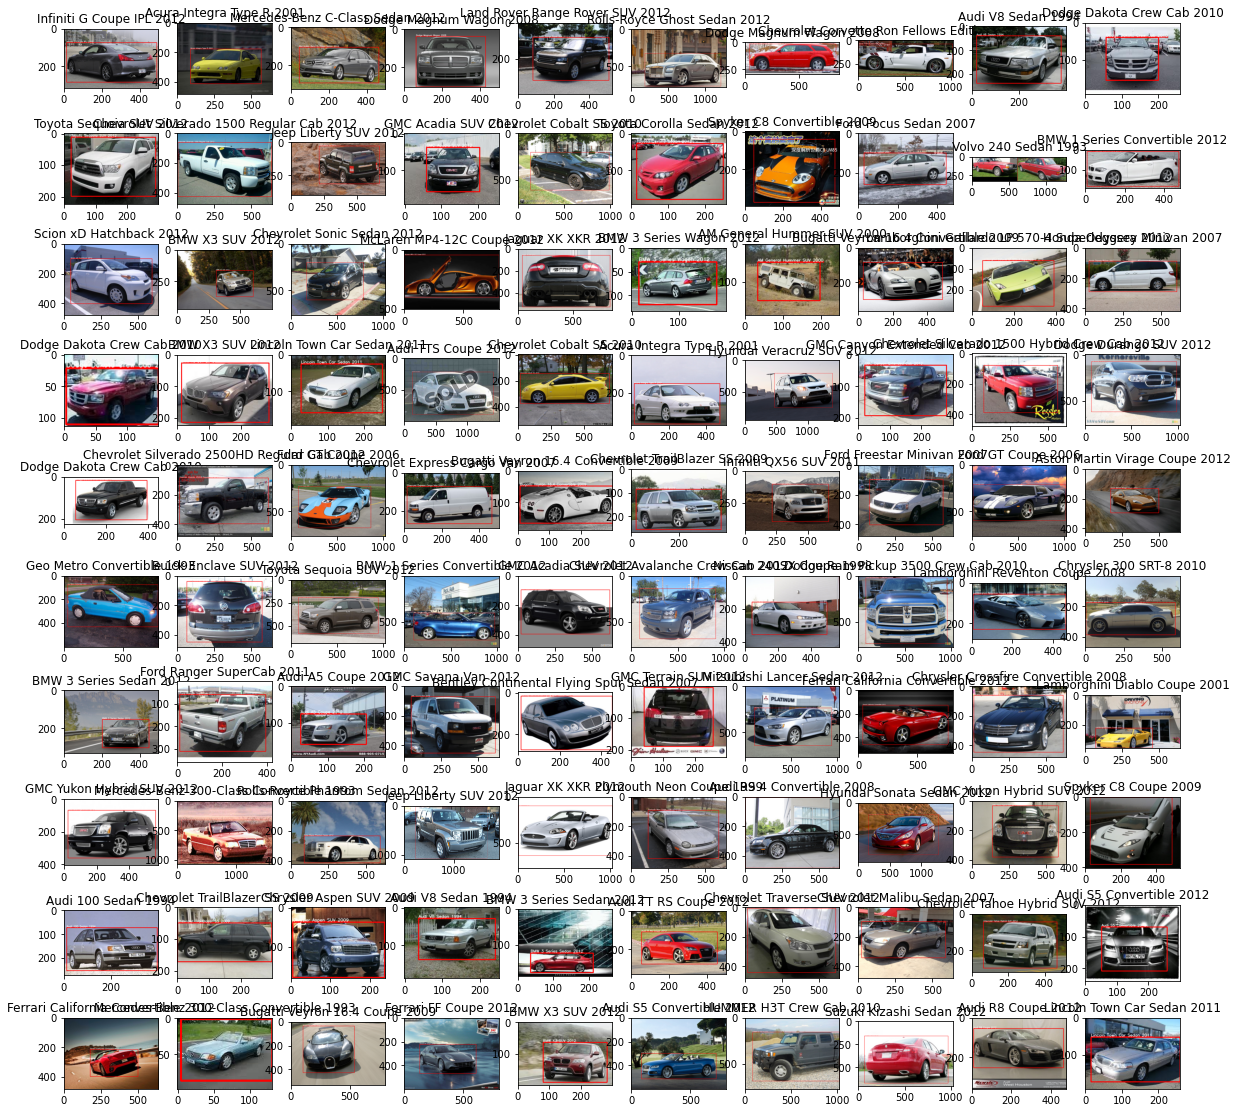

In [119]:
df_visualize = df_train.sample(100)
image_paths = list(df_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_visualize['Car_Name'])
bbox_list = list(df_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

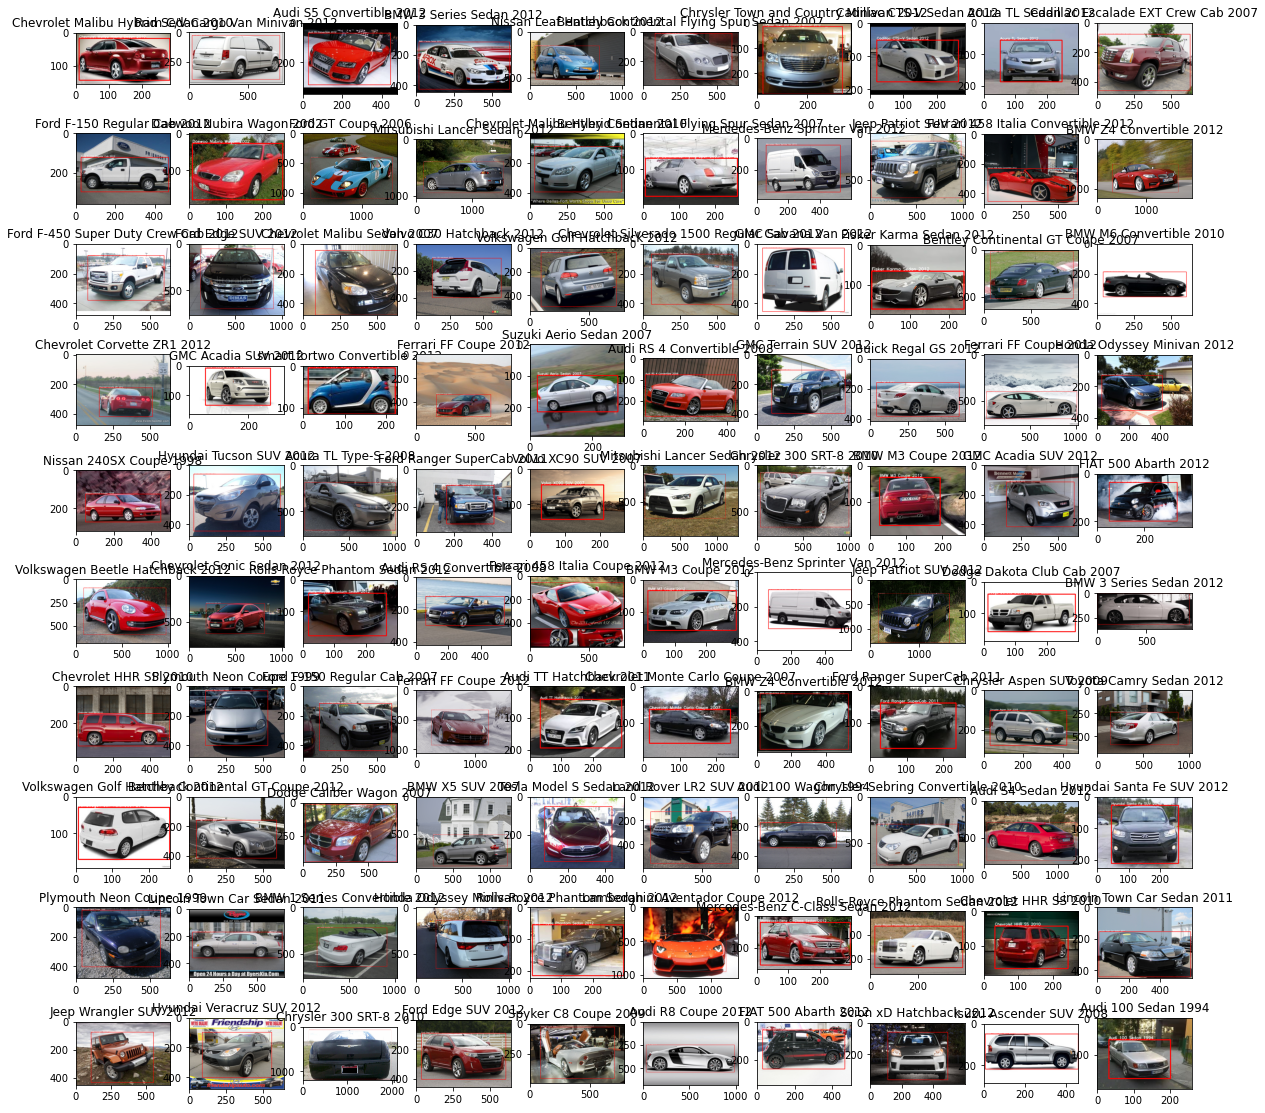

In [120]:
df_test_visualize = df_test.sample(100)
image_paths = list(df_test_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_test_visualize['Car_Name'])
bbox_list = list(df_test_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

In [121]:
df_train.describe().transpose()

count           mean            std          min  \
Start_x          8144.0      64.906803      82.198684     1.000000   
Start_y          8144.0     108.661223     104.551635     1.000000   
End_x            8144.0     638.208620     410.776734    76.000000   
End_y            8144.0     416.431606     273.786000    47.000000   
Image_class      8144.0      98.979371      56.503148     1.000000   
Orig_img_height  8144.0     482.771979     317.580021    57.000000   
Orig_img_width   8144.0     699.793099     450.922445    78.000000   
Img_AR           8144.0       1.473561       0.232987     0.593066   
bb_width         8144.0     573.301817     375.675050    73.000000   
bb_height        8144.0     307.770383     213.463238    23.000000   
bb_AR            8144.0       1.951161       0.488941     0.559322   
img_area         8144.0  477026.917117  890130.689330  4524.000000   
bb_area          8144.0  249462.668713  494907.035699  1748.000000   

                           25%            50%            75%           max  
Start_x              19.000000      39.000000      79.000000  1.648000e+03  
Start_y              42.000000      80.000000     138.250000  1.508000e+03  
End_x               392.000000     569.000000     746.250000  5.205000e+03  
End_y               248.000000     360.000000     477.000000  3.389000e+03  
Image_class          50.000000      99.000000     148.000000  1.960000e+02  
Orig_img_height     290.000000     424.000000     540.000000  3.744000e+03  
Orig_img_width      429.000000     636.500000     800.000000  5.616000e+03  
Img_AR                1.333333       1.348485       1.519757  3.887538e+00  
bb_width            338.000000     504.000000     659.000000  4.156000e+03  
bb_height           173.000000     260.000000     370.000000  2.648000e+03  
bb_AR                 1.593023       1.867606       2.249385  3.975000e+00  
img_area         121240.000000  265752.000000  432363.750000  2.102630e+07  
bb_area           59735.000000  130497.000000  237495.750000  9.874656e+06

In [51]:
df_train['bb_area/img_area'] = df_train['bb_area']/df_train['img_area']
df_train.head(5)

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0  00001.jpg     39.0    116.0   569.0   375.0           14   
1  00002.jpg     36.0    116.0   868.0   587.0            3   
2  00003.jpg     85.0    109.0   601.0   381.0           91   
3  00004.jpg    621.0    393.0  1484.0  1096.0          134   
4  00005.jpg     14.0     36.0   133.0    99.0          106   

                                          Image_Path  \
0  C:\Users\uprak\capstone\Car Images\Train Image...   
1  C:\Users\uprak\capstone\Car Images\Train Image...   
2  C:\Users\uprak\capstone\Car Images\Train Image...   
3  C:\Users\uprak\capstone\Car Images\Train Image...   
4  C:\Users\uprak\capstone\Car Images\Train Image...   

                              Car_Name                            Bbox  \
0                  Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                  Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2           Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3     Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4  Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   

   Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height     bb_AR  \
0              400             600  1.500000     530.0      259.0  2.046332   
1              675             900  1.333333     832.0      471.0  1.766454   
2              480             640  1.333333     516.0      272.0  1.897059   
3             1386            2100  1.515152     863.0      703.0  1.227596   
4              108             144  1.333333     119.0       63.0  1.888889   

   img_area   bb_area                                             Images  \
0    240000  137270.0  [[[101 119 123]\n  [ 98 116 120]\n  [ 93 111 1...   
1    607500  391872.0  [[[164 169 175]\n  [166 171 177]\n  [169 174 1...   
2    307200  140352.0  [[[231 231 231]\n  [244 244 244]\n  [234 234 2...   
3   2910600  606689.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...   
4     15552    7497.0  [[[136 167 196]\n  [136 167 196]\n  [138 169 1...   

   bb_area/img_area  
0          0.571958  
1          0.645057  
2          0.456875  
3          0.208441  
4          0.482060

In [52]:
cols = list(df_train.columns)
cols

['Image_Name',
 'Start_x',
 'Start_y',
 'End_x',
 'End_y',
 'Image_class',
 'Image_Path',
 'Car_Name',
 'Bbox',
 'Orig_img_height',
 'Orig_img_width',
 'Img_AR',
 'bb_width',
 'bb_height',
 'bb_AR',
 'img_area',
 'bb_area',
 'Images',
 'bb_area/img_area']

In [53]:
df_eda = df_train[['Image_Name','Image_class','Bbox','Orig_img_width','Orig_img_height','Img_AR','bb_width','bb_height','bb_AR',
                  'img_area','bb_area','bb_area/img_area']]

In [54]:
df_eda.sample(10)

Image_Name  Image_class                            Bbox  Orig_img_width  \
2672  02673.jpg           59      [72.0, 61.0, 541.0, 291.0]             550   
3318  03319.jpg          125      [19.0, 35.0, 242.0, 174.0]             259   
3178  03179.jpg          149  [196.0, 113.0, 1563.0, 1118.0]            1920   
5680  05681.jpg           77      [55.0, 84.0, 393.0, 278.0]             451   
1108  01109.jpg          167   [578.0, 169.0, 1427.0, 925.0]            1921   
5775  05776.jpg          145      [11.0, 87.0, 944.0, 736.0]            1024   
2258  02259.jpg           44      [14.0, 19.0, 450.0, 274.0]             454   
1356  01357.jpg           44     [52.0, 122.0, 750.0, 429.0]             800   
5184  05185.jpg          112     [80.0, 231.0, 861.0, 679.0]            1024   
2024  02025.jpg           22      [10.0, 42.0, 310.0, 180.0]             320   

      Orig_img_height    Img_AR  bb_width  bb_height     bb_AR  img_area  \
2672              323  1.702786     469.0      230.0  2.039130    177650   
3318              194  1.335052     223.0      139.0  1.604317     50246   
3178             1280  1.500000    1367.0     1005.0  1.360199   2457600   
5680              338  1.334320     338.0      194.0  1.742268    152438   
1108             1080  1.778704     849.0      756.0  1.123016   2074680   
5775              768  1.333333     933.0      649.0  1.437596    786432   
2258              280  1.621429     436.0      255.0  1.709804    127120   
1356              533  1.500938     698.0      307.0  2.273616    426400   
5184              768  1.333333     781.0      448.0  1.743304    786432   
2024              200  1.600000     300.0      138.0  2.173913     64000   

        bb_area  bb_area/img_area  
2672   107870.0          0.607205  
3318    30997.0          0.616905  
3178  1373835.0          0.559015  
5680    65572.0          0.430155  
1108   641844.0          0.309370  
5775   605517.0          0.769955  
2258   111180.0          0.874607  
1356   214286.0          0.502547  
5184   349888.0          0.444906  
2024    41400.0          0.646875

<AxesSubplot:xlabel='Img_AR', ylabel='Count'>

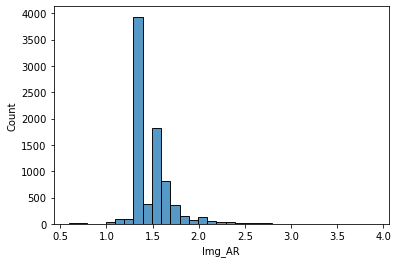

In [55]:
sns.histplot(data=df_eda,x='Img_AR',binwidth=0.1)

In [56]:
np.mean(np.array(df_eda['Img_AR']))

1.4735606114201925

<AxesSubplot:xlabel='bb_AR', ylabel='Count'>

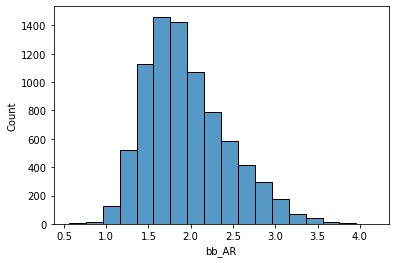

In [57]:
sns.histplot(data=df_eda,x='bb_AR',binwidth=0.2)

In [58]:
np.mean(np.array(df_eda['bb_AR']))

1.9511606317887489

In [59]:
df_group.sample(5)

Start_x     Start_y       End_x       End_y  Orig_img_height  \
Image_class                                                                   
134          75.823529  122.676471  573.294118  370.352941       444.529412   
119          64.161765   85.779412  610.647059  403.235294       459.088235   
76           39.000000   65.045455  439.840909  298.681818       335.909091   
98           70.152174  154.326087  894.847826  581.782609       695.695652   
39           98.972973  118.351351  526.540541  334.729730       391.540541   

             Orig_img_width    Img_AR    bb_width   bb_height     bb_AR  \
Image_class                                                               
134              665.764706  1.523828  497.470588  247.676471  2.065191   
119              664.720588  1.480158  546.485294  317.455882  1.784687   
76               483.022727  1.473433  400.840909  233.636364  1.747487   
98               974.000000  1.422008  824.695652  427.456522  2.017653   
39               599.351351  1.542289  427.567568  216.378378  2.101122   

                  img_area        bb_area  
Image_class                                
134          399625.382353  154786.264706  
119          420236.470588  233624.941176  
76           237099.272727  135174.136364  
98           974127.000000  498596.217391  
39           329751.486486  128508.108108

In [60]:
df_group.reset_index(inplace=True)
df_group

Image_class     Start_x     Start_y       End_x       End_y  \
0              1   33.355556   67.333333  449.688889  306.000000   
1              2   69.718750  113.250000  633.250000  380.281250   
2              3   63.953488   99.046512  657.558140  419.860465   
3              4   50.380952  131.261905  673.285714  435.357143   
4              5   47.195122   95.853659  486.926829  313.414634   
..           ...         ...         ...         ...         ...   
191          192  116.395349  163.162791  912.906977  600.930233   
192          193   83.833333  113.166667  693.047619  454.404762   
193          194   84.391304  123.260870  787.304348  485.195652   
194          195   54.674419   74.581395  550.883721  367.627907   
195          196   62.750000   70.550000  553.850000  391.575000   

     Orig_img_height  Orig_img_width    Img_AR    bb_width   bb_height  \
0         338.777778      491.133333  1.488229  416.333333  238.666667   
1         444.343750      694.250000  1.626136  563.531250  267.031250   
2         482.976744      714.046512  1.490232  593.604651  320.813953   
3         505.428571      720.023810  1.427891  622.904762  304.095238   
4         370.536585      529.878049  1.467877  439.731707  217.560976   
..               ...             ...       ...         ...         ...   
191       699.348837     1021.767442  1.480585  796.511628  437.767442   
192       517.261905      778.547619  1.541277  609.214286  341.238095   
193       566.913043      837.391304  1.539087  702.913043  361.934783   
194       409.813953      595.023256  1.478335  496.209302  293.046512   
195       426.250000      623.525000  1.462446  491.100000  321.025000   

        bb_AR       img_area        bb_area  
0    1.733447  339422.000000  185725.533333  
1    2.193562  421385.937500  192106.718750  
2    1.999234  510487.860465  294358.186047  
3    2.079940  416349.880952  211456.714286  
4    2.016969  346084.951220  169860.097561  
..        ...            ...            ...  
191  1.924556  825807.209302  433913.860465  
192  1.873040  487950.666667  241788.619048  
193  2.088240  537252.239130  285973.065217  
194  1.713090  288334.674419  171179.627907  
195  1.526207  373605.325000  218841.350000  

[196 rows x 13 columns]

In [61]:
df_group['Car_Name'] = df_group['Image_class'].apply(lambda x:car_dict[int(x)])

<AxesSubplot:xlabel='Image_class', ylabel='bb_area'>

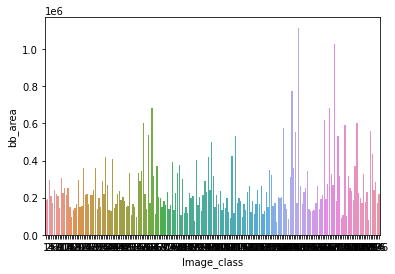

In [62]:
sns.barplot(data=df_group,x='Image_class',y='bb_area')

In [63]:
np.mean(np.array(df_eda['bb_area']))

249462.66871316306

In [153]:
target = os.path.join(car_img_path,'train_img_resize')
image_paths = list(df_train['Image_Path']) 
image_name = list(df_train['Image_Name'])
i=0
for p in image_paths:
    to_file = os.path.join(target,image_name[i])
    im = read_image(p)
    image = np.array(tf.image.resize_with_pad(im,224,224,method=tf.image.ResizeMethod.BILINEAR,antialias=False))
    #img = np.expand_dims(np.array(image,dtype=float)/255,axis=0)
    image = array_to_img(image)
    image.save(to_file)
    #cv.imwrite(target,image,[cv.IMWRITE_JPEG_QUALITY, 50])
#    if i == 0:
#        imgs = np.expand_dims(np.array(image,dtype=float)/255,axis=0)
#    else:
#        img = np.expand_dims(np.array(image,dtype=float)/255,axis=0)
#        imgs = np.append(imgs,img,axis=0)  
    i = i + 1

In [154]:
target = os.path.join(car_img_path,'test_img_resize')
image_paths = list(df_test['Image_Path']) 
image_name = list(df_test['Image_Name'])
i=0
for p in image_paths:
    to_file = os.path.join(target,image_name[i])
    im = read_image(p)
    image = np.array(tf.image.resize_with_pad(im,224,224,method=tf.image.ResizeMethod.BILINEAR,antialias=False))
    #img = np.expand_dims(np.array(image,dtype=float)/255,axis=0)
    image = array_to_img(image)
    image.save(to_file)
    #cv.imwrite(target,image,[cv.IMWRITE_JPEG_QUALITY, 50])
#    if i == 0:
#        imgs = np.expand_dims(np.array(image,dtype=float)/255,axis=0)
#    else:
#        img = np.expand_dims(np.array(image,dtype=float)/255,axis=0)
#        imgs = np.append(imgs,img,axis=0)  
    i = i + 1

In [64]:
f_train_name = {}
file_path = os.path.join(car_img_path,'train_img_resize')
for filename in os.listdir(file_path):
    f_train_name[filename] = os.path.join(file_path,filename)

In [65]:
f_test_name = {}
file_path = os.path.join(car_img_path,'test_img_resize')
for filename in os.listdir(file_path):
    f_test_name[filename] = os.path.join(file_path,filename)

In [66]:
df_train['Resize_Image_Path'] = df_train['Image_Name'].apply(lambda x:f_train_name[x])
df_test['Resize_Image_Path'] = df_test['Image_Name'].apply(lambda x:f_test_name[x])

In [67]:
df_test['Resize_Image_Path']

0       C:\Users\uprak\capstone\Car Images\test_img_re...
1       C:\Users\uprak\capstone\Car Images\test_img_re...
2       C:\Users\uprak\capstone\Car Images\test_img_re...
3       C:\Users\uprak\capstone\Car Images\test_img_re...
4       C:\Users\uprak\capstone\Car Images\test_img_re...
                              ...                        
8036    C:\Users\uprak\capstone\Car Images\test_img_re...
8037    C:\Users\uprak\capstone\Car Images\test_img_re...
8038    C:\Users\uprak\capstone\Car Images\test_img_re...
8039    C:\Users\uprak\capstone\Car Images\test_img_re...
8040    C:\Users\uprak\capstone\Car Images\test_img_re...
Name: Resize_Image_Path, Length: 8041, dtype: object

In [68]:
ytrain = list(df_train['Car_Name'])
ytest = list(df_test['Car_Name'])

In [69]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.25)
test_datagen  = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(df_train,directory=None, x_col='Resize_Image_Path', y_col='Car_Name',subset="training",weight_col=None,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=8,shuffle=True)
valid_generator = train_datagen.flow_from_dataframe(df_train,directory=None, x_col='Resize_Image_Path', y_col='Car_Name',subset="validation",weight_col=None,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=8,shuffle=True)
test_generator = test_datagen.flow_from_dataframe(df_test,directory=None, x_col='Resize_Image_Path', y_col=None,weight_col=None,target_size=(224,224),color_mode='rgb',class_mode=None,batch_size=8,shuffle=False)

Found 6108 validated image filenames belonging to 196 classes.
Found 2036 validated image filenames belonging to 196 classes.
Found 8041 validated image filenames.


In [70]:
class_label_map = train_generator.class_indices
class_label_map

{'AM General Hummer SUV 2000': 0,
 'Acura Integra Type R 2001': 1,
 'Acura RL Sedan 2012': 2,
 'Acura TL Sedan 2012': 3,
 'Acura TL Type-S 2008': 4,
 'Acura TSX Sedan 2012': 5,
 'Acura ZDX Hatchback 2012': 6,
 'Aston Martin V8 Vantage Convertible 2012': 7,
 'Aston Martin V8 Vantage Coupe 2012': 8,
 'Aston Martin Virage Convertible 2012': 9,
 'Aston Martin Virage Coupe 2012': 10,
 'Audi 100 Sedan 1994': 11,
 'Audi 100 Wagon 1994': 12,
 'Audi A5 Coupe 2012': 13,
 'Audi R8 Coupe 2012': 14,
 'Audi RS 4 Convertible 2008': 15,
 'Audi S4 Sedan 2007': 16,
 'Audi S4 Sedan 2012': 17,
 'Audi S5 Convertible 2012': 18,
 'Audi S5 Coupe 2012': 19,
 'Audi S6 Sedan 2011': 20,
 'Audi TT Hatchback 2011': 21,
 'Audi TT RS Coupe 2012': 22,
 'Audi TTS Coupe 2012': 23,
 'Audi V8 Sedan 1994': 24,
 'BMW 1 Series Convertible 2012': 25,
 'BMW 1 Series Coupe 2012': 26,
 'BMW 3 Series Sedan 2012': 27,
 'BMW 3 Series Wagon 2012': 28,
 'BMW 6 Series Convertible 2007': 29,
 'BMW ActiveHybrid 5 Sedan 2012': 30,
 'BMW 

In [71]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(196, activation='softmax'))
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [72]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20)

Epoch 1/20


ResourceExhaustedError:  failed to allocate memory
	 [[node RMSprop/RMSprop/update_8/mul_2
 (defined at C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\rmsprop.py:211)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1300]

Errors may have originated from an input operation.
Input Source operations connected to node RMSprop/RMSprop/update_8/mul_2:
In[0] RMSprop/Identity (defined at C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:955)	
In[1] RMSprop/IdentityN (defined at C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\utils.py:35)

Operation defined at: (most recent call last)
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\uprak\AppData\Local\Temp/ipykernel_20240/3875776026.py", line 4, in <module>
>>>     model.fit_generator(generator=train_generator,
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\engine\training.py", line 2016, in fit_generator
>>>     return self.fit(
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\engine\training.py", line 816, in train_step
>>>     self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 532, in minimize
>>>     return self.apply_gradients(grads_and_vars, name=name)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 672, in apply_gradients
>>>     return self._distributed_apply(strategy, grads_and_vars, name,
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 721, in _distributed_apply
>>>     update_op = distribution.extended.update(
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 704, in apply_grad_to_update_var
>>>     update_op = self._resource_apply_dense(grad, var, **apply_kwargs)
>>> 
>>>   File "C:\Users\uprak\anaconda3\envs\tflow\lib\site-packages\keras\optimizer_v2\rmsprop.py", line 211, in _resource_apply_dense
>>>     var_t = var - coefficients["lr_t"] * grad / (
>>> 